In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
ast = pd.read_csv("3268270.csv")
ast.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,KZ000035188,"ASTANA, KZ",1973-01-01,0.0,NaN,-15.8,-10.5,-21.0
1,KZ000035188,"ASTANA, KZ",1973-01-02,1.4,NaN,-13.1,-9.3,-19.2
2,KZ000035188,"ASTANA, KZ",1973-01-03,1.8,NaN,-9.8,-7.8,-14.2
3,KZ000035188,"ASTANA, KZ",1973-01-04,0.2,NaN,-10.2,-6.3,-17.6
4,KZ000035188,"ASTANA, KZ",1973-01-05,2.4,201.0,-9.5,-6.3,-18.2


In [3]:
ast.notnull().sum() #lack of data for SNWD - snowdepth, will try to change that

STATION    18328
NAME       18328
DATE       18328
PRCP       12053
SNWD        3240
TAVG       18328
TMAX       16267
TMIN       12909
dtype: int64

In [4]:
ast["YEAR"] = ast["DATE"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
ast["MONTH"]  = ast["DATE"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').month)
ast["DAY"] = ast["DATE"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').day)

In [5]:
ast[(ast['MONTH']>3) & (ast['MONTH']<10) & (pd.isnull(ast['SNWD'])==True)] = ast[(ast['MONTH']>3) & (ast['MONTH']<10) & (pd.isnull(ast['SNWD'])==True)].fillna(0)
#For warm month changing NaN values of SNWD to 0


#For other month changing Nan values to mean values of each month
for i in range(1,4):
    ast.loc[ast['MONTH']==i,'SNWD'] = ast.loc[ast['MONTH']==i,'SNWD'].fillna(ast.loc[ast['MONTH']==i,'SNWD'].mean())

for i in range(10,13):
    ast.loc[ast['MONTH']==i,'SNWD'] = ast.loc[ast['MONTH']==i,'SNWD'].fillna(ast.loc[ast['MONTH']==i,'SNWD'].mean())

In [6]:
ast = ast.dropna()

#### Checking data on the graphs. 1) It visible that there is little data in the range (12500,17500) therefore delete this period. 2) Three spikes on the second graph cause doubts and are brobably garbage data, therefore delete them 

<AxesSubplot:>

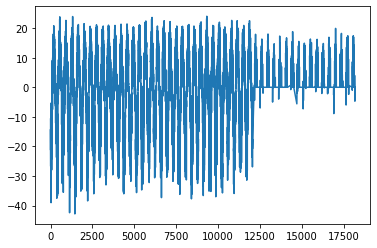

In [7]:
ast["TMIN"].plot()

<AxesSubplot:>

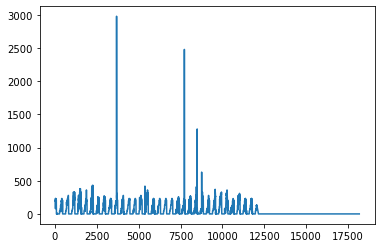

In [8]:
ast["SNWD"].plot()

In [9]:
ast[ast['SNWD']>1000]

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,MONTH,DAY
3680,KZ000035188,"ASTANA, KZ",1983-01-29,0.9,2979.0,-9.0,-7.1,-14.3,1983,1,29
7727,KZ000035188,"ASTANA, KZ",1994-02-27,0.0,2479.0,-11.7,-7.7,-16.5,1994,2,27
8491,KZ000035188,"ASTANA, KZ",1996-04-01,0.0,1280.0,-6.5,-1.5,-11.9,1996,4,1


<AxesSubplot:>

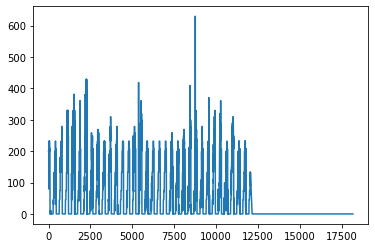

In [10]:
ast = ast.drop([3680,7727,8491], axis=0)
ast["SNWD"].plot()

<AxesSubplot:>

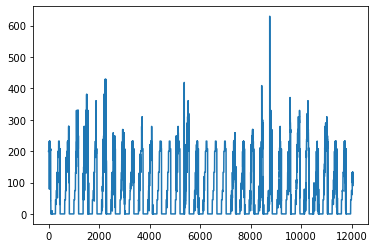

In [11]:
ast = ast.drop(ast.index[12031:], axis=0)
ast["SNWD"].plot()

In [12]:
ast['TARGET'] = ast.shift(-1)['TMAX']
ast['TARGET'].iloc[-1] = ast['TARGET'].iloc[-2]
ast

E:\Programming\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,MONTH,DAY,TARGET
0,KZ000035188,"ASTANA, KZ",1973-01-01,0.0,199.389430,-15.8,-10.5,-21.0,1973,1,1,-9.3
1,KZ000035188,"ASTANA, KZ",1973-01-02,1.4,199.389430,-13.1,-9.3,-19.2,1973,1,2,-7.8
2,KZ000035188,"ASTANA, KZ",1973-01-03,1.8,199.389430,-9.8,-7.8,-14.2,1973,1,3,-6.3
3,KZ000035188,"ASTANA, KZ",1973-01-04,0.2,199.389430,-10.2,-6.3,-17.6,1973,1,4,-6.3
4,KZ000035188,"ASTANA, KZ",1973-01-05,2.4,201.000000,-9.5,-6.3,-18.2,1973,1,5,-13.5
...,...,...,...,...,...,...,...,...,...,...,...,...
12048,KZ000035188,"ASTANA, KZ",2005-12-27,0.8,132.656489,-2.6,-0.7,-3.3,2005,12,27,-2.7
12049,KZ000035188,"ASTANA, KZ",2005-12-28,1.7,132.656489,-7.5,-2.7,-13.5,2005,12,28,-13.5
12050,KZ000035188,"ASTANA, KZ",2005-12-29,0.2,132.656489,-20.9,-13.5,-26.9,2005,12,29,-10.7
12051,KZ000035188,"ASTANA, KZ",2005-12-30,1.1,132.656489,-12.6,-10.7,-17.5,2005,12,30,-12.9


### 

#### Writing function to create predictions.

In [13]:
from sklearn.linear_model import Ridge

In [14]:
r = Ridge(alpha=0.1)

In [15]:
predictors = ast.columns[~ast.columns.isin(['TARGET','NAME','STATION','DATE','YEAR','MONTH','DAY'])]
predictors

Index(['PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [44]:
def forecast(ast, model, predictors, start=1000, step=50):
    all_ = []
    
    for i in range(start, ast.shape[0], step):
        test = ast.iloc[i:(i+step),:]
        train = ast.iloc[:i,:]
       
        model.fit(train[predictors], train['TARGET'])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        merged = pd.concat([test['TARGET'], preds], axis=1)
        
        merged.columns = ['real', 'forecast']
        merged['difference'] = (merged['forecast'] - merged['real']).abs()
        
        all_.append(merged)
    return pd.concat(all_)

#### Obtaining predictions.The column 'difference' is the error between prediction and actual data. As it can be seen mean error is 3 degrees Celcius, which is quite good result

In [45]:
predictions = forecast(ast, r, predictors)
predictions

,real,forecast,diff
1000,14.1,11.109744,2.990256
1001,18.0,14.581815,3.418185
1002,19.3,18.013632,1.286368
1003,11.7,18.924063,7.224063
1004,11.7,12.413216,0.713216
...,...,...,...
12048,-2.7,-0.026396,2.673604
12049,-13.5,-2.154736,11.345264
12050,-10.7,-13.187469,2.487469
12051,-12.9,-8.271363,4.628637


In [46]:
predictions['diff'].mean()

3.0098449037406994